In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [67]:
df = pd.read_excel('New Data.xlsx')

In [68]:
df.head(10)

,Car,Class,Displacement,Fuel Type,Hwy MPG
0,1,Compact,3.1,P,25
1,2,Compact,3.1,P,25
2,3,Compact,3.0,P,25
3,4,Compact,3.0,P,25
4,5,Compact,3.0,P,25
5,6,Compact,3.0,P,25
6,7,Compact,2.4,P,25
7,8,Compact,3.5,P,25
8,9,Compact,3.0,P,25
9,10,Compact,2.4,P,24


In [7]:
df.describe

<bound method NDFrame.describe of      Car    Class  Displacement Fuel Type  Hwy MPG
0      1  Compact           3.1         P       25
1      2  Compact           3.1         P       25
2      3  Compact           3.0         P       25
3      4  Compact           3.0         P       25
4      5  Compact           3.0         P       25
..   ...      ...           ...       ...      ...
306  307    Large           2.4         R       25
307  308    Large           3.0         R       25
308  309    Large           3.0         R       25
309  310    Large           3.0         R       25
310  311    Large           3.0         R       25

[311 rows x 5 columns]>

In [17]:
df.corr()

,Car,Displacement,Hwy MPG
Car,1.000000,-0.327073,0.301184
Displacement,-0.327073,1.000000,-0.833339
Hwy MPG,0.301184,-0.833339,1.000000


In [71]:
inputs, targets = df['Displacement'].array.reshape(-1,1), df['Hwy MPG'].array.reshape(-1,1)

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

In [72]:
(predictions - targets).std()

2.21756801383431

In [73]:
model.coef_

array([[-2.88208887]])

In [74]:
model.intercept_

array([35.39503926])

In [84]:
model.score(inputs, targets)

0.694453202395662

In [75]:
sm_inputs = sm.add_constant(df.Displacement)
sm_targets = df['Hwy MPG']

In [76]:
model_sum = sm.OLS(sm_targets, sm_inputs).fit().summary()

In [77]:
model_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Hwy MPG   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     702.3
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.51e-81
Time:                        22:48:03   Log-Likelihood:                -688.47
No. Observations:                 311   AIC:                             1381.
Df Residuals:                     309   BIC:                             1388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.3950      0.382     92.698      0.000      34.644      36.146
Displacement    -2.8821      0.109    -26.501      0.000      -3.096      -2.668
==============================================================================
Omnibus:                        3.308   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                3.206
Skew:                           0.198   Prob(JB):                        0.201
Kurtosis:                       2.700   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
dof = 309
stats.t.isf(.05/2, dof)

1.967670885355754

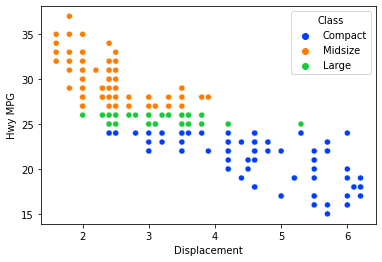

<Figure size 432x288 with 0 Axes>

In [38]:
sns.scatterplot(x = 'Displacement', y = 'Hwy MPG', hue = 'Class', palette = 'bright', data = df)
plt.show()
plt.clf()

In [69]:
dummies = pd.get_dummies(df['Class']).rename(columns=lambda x: 'Class_' + str(x))
df = pd.concat([df, dummies], axis=1)
df

,Car,Class,Displacement,Fuel Type,Hwy MPG,Class_Compact,Class_Large,Class_Midsize
0,1,Compact,3.1,P,25,1,0,0
1,2,Compact,3.1,P,25,1,0,0
2,3,Compact,3.0,P,25,1,0,0
3,4,Compact,3.0,P,25,1,0,0
4,5,Compact,3.0,P,25,1,0,0
...,...,...,...,...,...,...,...,...
306,307,Large,2.4,R,25,0,1,0
307,308,Large,3.0,R,25,0,1,0
308,309,Large,3.0,R,25,0,1,0
309,310,Large,3.0,R,25,0,1,0


In [85]:
inputs_2 = df[['Displacement','Class_Large', 'Class_Midsize']]

model_2 = LinearRegression().fit(inputs_2, targets)

predictions_2 = model_2.predict(inputs_2)

In [86]:
model_2.coef_

array([[-1.66253607,  1.80472631,  4.46856027]])

In [87]:
model_2.intercept_

array([29.03594642])

In [88]:
sm_inputs_2 = sm.add_constant(inputs_2)
sm_targets_2 = df['Hwy MPG']

In [89]:
model_sum = sm.OLS(sm_targets_2, sm_inputs_2).fit().summary()
model_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Hwy MPG   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     460.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.78e-113
Time:                        22:52:03   Log-Likelihood:                -607.72
No. Observations:                 311   AIC:                             1223.
Df Residuals:                     307   BIC:                             1238.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.0359      0.559     51.949      0.000      27.936      30.136
Displacement     -1.6625      0.122    -13.633      0.000      -1.902      -1.423
Class_Large       1.8047      0.305      5.909      0.000       1.204       2.406
Class_Midsize     4.4686      0.319     14.025      0.000       3.842       5.096
==============================================================================
Omnibus:                        6.710   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.958
Skew:                           0.269   Prob(JB):                       0.0308
Kurtosis:                       3.497   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
dof = 307
stats.t.isf(.05/2, dof)

1.9677212881552217

In [96]:
dummies = pd.get_dummies(df['Fuel Type']).rename(columns=lambda x: 'Fuel Type_' + str(x))
df = pd.concat([df, dummies], axis=1)
df

,Car,Class,Displacement,Fuel Type,Hwy MPG,Class_Compact,Class_Large,Class_Midsize,Fuel Type_P,Fuel Type_R
0,1,Compact,3.1,P,25,1,0,0,1,0
1,2,Compact,3.1,P,25,1,0,0,1,0
2,3,Compact,3.0,P,25,1,0,0,1,0
3,4,Compact,3.0,P,25,1,0,0,1,0
4,5,Compact,3.0,P,25,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
306,307,Large,2.4,R,25,0,1,0,0,1
307,308,Large,3.0,R,25,0,1,0,0,1
308,309,Large,3.0,R,25,0,1,0,0,1
309,310,Large,3.0,R,25,0,1,0,0,1


In [97]:
inputs_3 = df[['Displacement','Class_Large', 'Class_Midsize', 'Fuel Type_P']]

model_3 = LinearRegression().fit(inputs_2, targets)

predictions_3 = model_3.predict(inputs_2)

In [98]:
sm_inputs_3 = sm.add_constant(inputs_3)
sm_targets_3 = df['Hwy MPG']

In [99]:
model_sum = sm.OLS(sm_targets_3, sm_inputs_3).fit().summary()
model_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Hwy MPG   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     383.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          7.06e-118
Time:                        22:58:41   Log-Likelihood:                -593.75
No. Observations:                 311   AIC:                             1197.
Df Residuals:                     306   BIC:                             1216.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.7624      0.552     53.905      0.000      28.676      30.849
Displacement     -1.6347      0.117    -13.984      0.000      -1.865      -1.405
Class_Large       1.6450      0.294      5.595      0.000       1.066       2.223
Class_Midsize     3.9634      0.319     12.411      0.000       3.335       4.592
Fuel Type_P      -1.1210      0.209     -5.364      0.000      -1.532      -0.710
==============================================================================
Omnibus:                        8.552   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               11.608
Skew:                           0.212   Prob(JB):                      0.00302
Kurtosis:                       3.846   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
dof = 306
stats.t.isf(.05/2, dof)

1.967746737589231